## 4.1. 단어 가방 모형

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pytextbook/pytextbook/blob/main/4.0.%20단어%20벡터화-BOW-tfidf.ipynb)


* https://scikit-learn.org/stable/modules/feature_extraction.html

## 라이브러리 설치 및 불러 오기
필요 라이브러리를 불러오기 위해 셀 왼쪽에 셀 실행 버튼(세모 모양)을 눌러 실행한다.

In [ ]:
# 불피요한 warnings 이 길게 출력되는 막기 위한 코드이다.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib 을 불러온다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

한글폰트 설정을 위한 koreanize-matplotlib가 설치 되어 있지 않다면 아래 코드의 주석(#)을 지우고 셀을 실행하여 설치한다. colab에서는 노트북을 새로 열 때마다 설치해야 한다.

In [ ]:
!pip install koreanize-matplotlib

## 시각화를 위한 한글폰트 설정

<Axes: title={'center': '한글'}>

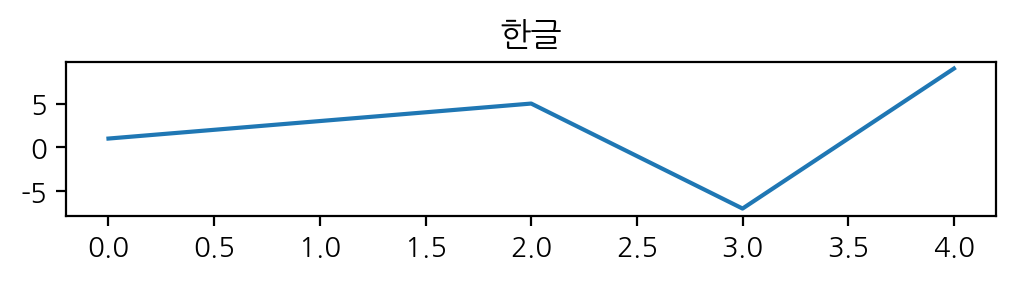

In [4]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1, 3, 5, -7, 9]).plot(title="한글", figsize=(6, 1))

##단어 가방 모형 만들기

### 분석의 순서     
 ●	분석하고자 하는 데이터를 corpus에 담는다. 여기서는 임의로 4개의 문장을 담았다.         
●	 sklearn.feature_extraction.text 에서 CountVectorizer() 를 불러온다.     
●	fit() 에 데이터(corpus)를 넣어 단어 사전을 학습시킨다.     
●	transform() 메서드를 통해 수치 행렬 형태로 변환한다.     


먼저 데이터를 ‘Corpus’에 담아 둔다. 여기서는 임의로 4개의 문장을 담았다.

In [5]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "택시 승강장 문의입니다."]

corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '택시 승강장 문의입니다.']

● sklearn.feature_extraction.text 에서 CountVectorizer() 를 통해 BOW를 생성한다.

* API documentation:https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

● 다음으로 문장에서 노출되는 feature(특징이 될만한 단어) 수를 합한 Document Term Matrix(이하 dtm) 을 반환하고 fit() 에 데이터(corpus)를 넣어 단어 사전을 학습시킨다. fit()은  모든 토큰의 어휘 사전을 학습한다.           
● 마지막으로 transform(): 문서를 단어 빈도수가 들어있는 문서 용어 매트릭스로 변환한다.

### fit, transform, fit_transfrom의 차이점
* fit(): 원시 문서에 있는 모든 토큰의 어휘 사전을 배운다.
* transform(): 문서를 문서 용어 매트릭스로 변환합니다. transform 이후엔 매트릭스로 변환되어 숫자형태로 변경된다.
* fit_transform(): 어휘 사전을 배우고 문서 용어 매트릭스를 반환한다. fit 다음에 변환이 오는 것과 동일하지만 더 효율적으로 구현된다.

⚠️ 주의! ⚠️
* 단, fit_transform 은 학습데이터에만 사용하고 예측 데이터에는 transform 을 사용한다.
* 예측 데이터에도 fit_transform 을 사용하게 된다면 서로 다른 단어사전으로 행렬을 만들게 된다.
* fit 과 transform 을 따로 사용해 준다 하더라도 fit 은 학습 데이터에만 사용한다. 같은 단어 사전으로 예측 데이터셋의 단어 사전을 만들기 위해서이다.

In [7]:
cvect = CountVectorizer()
cvect.fit(corpus)
dtm = cvect.transform(corpus)
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (4, 9)>

In [8]:
dtm.toarray()

array([[1, 1, 1, 0, 0, 0, 0, 2, 0],
       [0, 1, 0, 0, 1, 1, 2, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1]])

또 다른 방법으로는 fit_transform()을 사용하여 효율적으로 구현할 수도 있다.

In [9]:
dtm = cvect.fit_transform(corpus)
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (4, 9)>

In [10]:
# 단어사전을 확인해 보면  {"단어": 인덱스번호} 로 되어 있음을 알 수 있다.
cvect.vocabulary_

{'코로나': 7,
 '거리두기와': 0,
 '상생지원금': 2,
 '문의입니다': 1,
 '지하철': 6,
 '운행시간과': 5,
 '요금': 4,
 '승강장': 3,
 '택시': 8}

get_feature_names_out()을 사용하면 dtm 이라는 변수로 쓰여진 단어-문서 행렬에 등장하는 순서대로 단어 사전을 반환한다.

In [11]:
vocab = cvect.get_feature_names_out()
vocab

array(['거리두기와', '문의입니다', '상생지원금', '승강장', '요금', '운행시간과', '지하철', '코로나',
       '택시'], dtype=object)

이제 document-term matrix를 판다스의 데이터프레임으로 만들어서 단어의 빈도를 확인할 수 있다.

In [12]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,1,1,0,0,0,0,2,0
1,0,1,0,0,1,1,2,0,0
2,0,1,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1


전체 문서에는 등장하지만, 해당 문서에는 등장하지 않는 단어는 0으로 표시된다. 예시 문서의 빈도수를 보면 첫 번째 문서에서 “코로나"라는 단어가 2번 등장하기 때문에 빈도수가 2로 표시가 되어 있다.  이제  이제 전체 문서에서 단어 빈도의 합계를 구하는 것으로 데이터를 간명하게 보이도록 요약한다.

In [13]:
# T는 가로로 길게 보이기 위해 위해 추가한 것이다.
df_dtm.sum().to_frame().T

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,4,1,2,1,1,3,2,1


### N-grams

* 토큰을 몇 개 사용할 것인지를 구분합니다. 지정한 n개의 숫자 만큼의 토큰을 묶어서 사용한다.
* 예를 들어 (1, 1) 이라면 1개의 토큰을 (2, 3)이라면 2~3개의 토큰을 사용한다.
* analyzer 설정에 따라 단어단위, 캐릭터 단위에 따라 사용할 수 있다.

* 기본값 = (1, 1)
* ngram_range(min_n, max_n)
* min_n <= n <= max_n
```
(1, 1) 은 1 <= n <= 1
(1, 2) 은 1 <= n <= 2
(2, 2) 은 2 <= n <= 2
```

In [14]:
# 단어가 너무 많아서 출력이 오래 걸린다면 max_columns 값을 조정해서 사용한다.
# pd.options.display.max_columns = None

In [15]:
# ngram_range: 추출할 다른 단어 n-gram 또는 char n-gram에 대한 n-값 범위의 하한 및 상한이다. 기본값 = (1, 1)
# ngram_range=(1, 2)
cvect = CountVectorizer(ngram_range=(1, 2))
dtm = cvect.fit_transform(corpus)
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 26 stored elements and shape (4, 20)>

In [16]:
#get_feature_names_out()을 사용하여 dtm 변수에 쓰여진 단어-문서 행렬에 등장하는 순서대로 단어 사전을 반환한다.
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0
1,0,0,1,0,0,0,0,1,1,1,1,2,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [17]:
# df_dtm.sum 으로 빈도수 합계를 구한다.
df_dtm.sum().to_frame().T

,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,1,1,4,1,1,2,2,1,1,1,1,3,1,1,1,2,1,1,1,1


### min_df

* 기본값=1
* min_df는 문서 빈도(문서의 %에 있음)가 지정된 임계값보다 엄격하게 낮은 용어를 무시한다.
* 예를 들어, min_df=0.66은 용어가 어휘의 일부로 간주되려면 문서의 66%에 나타나야 한다.
* 때때로 min_df가 어휘 크기를 제한하는 데 사용된다.
* 예를들어 min_df를 0.1, 0.2로 설정한다면 10%, 20%에 나타나는 용어만 학습한다.

### max_df

* 기본값=**1**
* max_df=int : 빈도수를 의미한다.
* max_df=float : 비율을 의미한다.
* 어휘를 작성할 때 주어진 임계값보다 문서 빈도가 엄격히 높은 용어는 무시한다.
* 빈번하게 등장하는 불용어 등을 제거하기에 편리하다.
* 예를 들어 코로나 관련 기사를 분석하면 90%에 '코로나'라는 용어가 등장할 수 있는데, 이 경우 max_df=0.89 로 비율을 설정하여 너무 빈번하게 등장하는 단어를 제외할 수 있다.

In [22]:
cvect = CountVectorizer(ngram_range=(1, 3), min_df=0.2, max_df=5)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 코로나,거리두기와 코로나 상생지원금,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,...,지하철 운행시간과,지하철 운행시간과 지하철,코로나,코로나 거리두기와,코로나 거리두기와 코로나,코로나 상생지원금,코로나 상생지원금 문의입니다,택시,택시 승강장,택시 승강장 문의입니다
0,1,1,1,1,1,1,0,0,0,0,...,0,0,2,1,1,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,1


### max_features

* 기본값 = None
* 벡터라이저가 학습할 기능(어휘)의 양 제한
* corpus중 빈도수가 가장 높은 순으로 해당 갯수만큼만 추출

In [23]:
# max_features : 갯수만큼의 단어만 추출

cvect = CountVectorizer(ngram_range=(1, 3), min_df=1, max_df=1.0, max_features=10)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와 코로나,거리두기와 코로나 상생지원금,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,지하철,코로나
0,1,1,1,1,1,0,0,0,0,2
1,0,0,1,0,0,0,0,1,2,0
2,0,0,1,0,0,1,1,0,1,0
3,0,0,1,0,0,1,1,0,0,0


### 불용어 stop_words

* 문장에 자주 등장하지만 "우리, 그, 그리고, 그래서" 등 관사, 전치사, 조사, 접속사 등의 단어로 문장 내에서 큰 의미를 갖지 않는 단어

In [24]:
stop_words=["코로나", "문의입니다"]
# max_features 갯수만큼의 단어만 추출하기

cvect = CountVectorizer(ngram_range=(1, 3), min_df=1, max_df=1.0, max_features=20, stop_words=stop_words)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 상생지원금,상생지원금,승강장,요금,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,지하철 운행시간과 지하철,택시,택시 승강장
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,2,0,1,1,1,0,0
2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1


### analyzer

* 기본값='word'
* 종류: word, char, char_wb
* 기능을 단어 n-그램으로 만들지 문자 n-그램으로 만들어야 하는지 여부이다. 옵션 'char_wb'는 단어 경계 내부의 텍스트에서만 문자 n-gram을 생성한다. 단어 가장자리의 n-gram은 공백으로 채워진다.
* 띄어쓰기가 제대로 되어 있지 않은 문자 등에 사용할 수 있다.

In [26]:
# analyzer='char', ngram_range=(2, 3)
# 키포인트: analyzer='char', 띄어쓰기도 여기에 포함되는거임.
cvect = CountVectorizer(analyzer='char',
                        ngram_range=(3, 5), min_df=2,
                        max_df=1.0, max_features=30,
                        stop_words=stop_words)

dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,문의,문의입,문의입니,승강,승강장,승강장,강장,강장 문,강장 문의,금 문,...,의입니다,의입니다.,입니다,입니다.,장 문,장 문의,장 문의입,지하철,지하철,하철
0,1,1,1,0,0,0,0,0,0,1,...,1,1,1,1,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,1,1,1,1,0,0,0,2,2,2
2,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,0,0,0


In [27]:
df_dtm.sum().nlargest(20)

,0
문의,4
문의입,4
문의입니,4
니다.,4
문의입,4
문의입니,4
문의입니다,4
의입니,4
의입니다,4
의입니다.,4


## 4.2. TF-IDF

\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}


### TfidfVectorizer

In [28]:
# sklearn.feature_extraction.text 에서 TfidfVectorizer 를 불러 온다.
# fit, transform 으로 변환한다.
# tfidfvect
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect = TfidfVectorizer()
tfidfvect.fit(corpus)
dtm = tfidfvect.transform(corpus)
dtm

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (4, 9)>

In [29]:
# fit_transform 으로 변환할 수도 있다.
dtm = tfidfvect.fit_transform(corpus)
dtm

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (4, 9)>

In [30]:
# dtm.toarray() 로 배열을 확인한다.
# 문서에 토큰이 더 많이 나타날수록 가중치는 더 커진다.
# 그러나 토큰이 문서에 많이 표시될수록 가중치가 감소한다.
dtm.toarray()

array([[0.39928771, 0.20836489, 0.39928771, 0.        , 0.        ,
        0.        , 0.        , 0.79857543, 0.        ],
       [0.        , 0.23921859, 0.        , 0.        , 0.45841237,
        0.45841237, 0.72283516, 0.        , 0.        ],
       [0.        , 0.42389674, 0.        , 0.64043405, 0.        ,
        0.        , 0.64043405, 0.        , 0.        ],
       [0.        , 0.37919167, 0.        , 0.5728925 , 0.        ,
        0.        , 0.        , 0.        , 0.72664149]])

In [31]:
# display_transform_dtm 으로 변환 결과를 확인한다.
vocab = tfidfvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
print("단어 수 : ", len(vocab))
print(vocab)
display(df_dtm.style.background_gradient())

단어 수 :  9
['거리두기와' '문의입니다' '상생지원금' '승강장' '요금' '운행시간과' '지하철' '코로나' '택시']


,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,0.399288,0.208365,0.399288,0.000000,0.000000,0.000000,0.000000,0.798575,0.000000
1,0.000000,0.239219,0.000000,0.000000,0.458412,0.458412,0.722835,0.000000,0.000000
2,0.000000,0.423897,0.000000,0.640434,0.000000,0.000000,0.640434,0.000000,0.000000
3,0.000000,0.379192,0.000000,0.572892,0.000000,0.000000,0.000000,0.000000,0.726641


# **추가 정보**

### IDF

**IDF**

- IDF 값은 문서군의 성격에 따라 결정된다. 예를 들어 '원자'라는 낱말은 일반적인 문서들 사이에서는 잘 나오지 않기 때문에 IDF 값이 높아지고 문서의 핵심어가 될 수 있지만, 원자에 대한 문서를 모아놓은 문서군의 경우 이 낱말은 상투어가 되어 각 문서들을 세분화하여 구분할 수 있는 다른 낱말들이 높은 가중치를 얻게 된다.

In [32]:
# 하나의 문서에만 나타나는 토큰은 idf 가중치가 높다.
# 적게 나타난 토큰이라도 모든 문서에도 있는 토큰은 idf가 낮다.
idf = tfidfvect.idf_
idf

array([1.91629073, 1.        , 1.91629073, 1.51082562, 1.91629073,
       1.91629073, 1.51082562, 1.91629073, 1.91629073])

In [33]:
# 사전만들기
# dict, zip 을 사용하여 피처명과 idf 값을 딕셔너리 형태로 만든다.
# idf_dict
vocab = tfidfvect.get_feature_names_out()
idf_dict = dict(zip(vocab, idf))
idf_dict

{'거리두기와': np.float64(1.916290731874155),
 '문의입니다': np.float64(1.0),
 '상생지원금': np.float64(1.916290731874155),
 '승강장': np.float64(1.5108256237659907),
 '요금': np.float64(1.916290731874155),
 '운행시간과': np.float64(1.916290731874155),
 '지하철': np.float64(1.5108256237659907),
 '코로나': np.float64(1.916290731874155),
 '택시': np.float64(1.916290731874155)}

<Axes: >

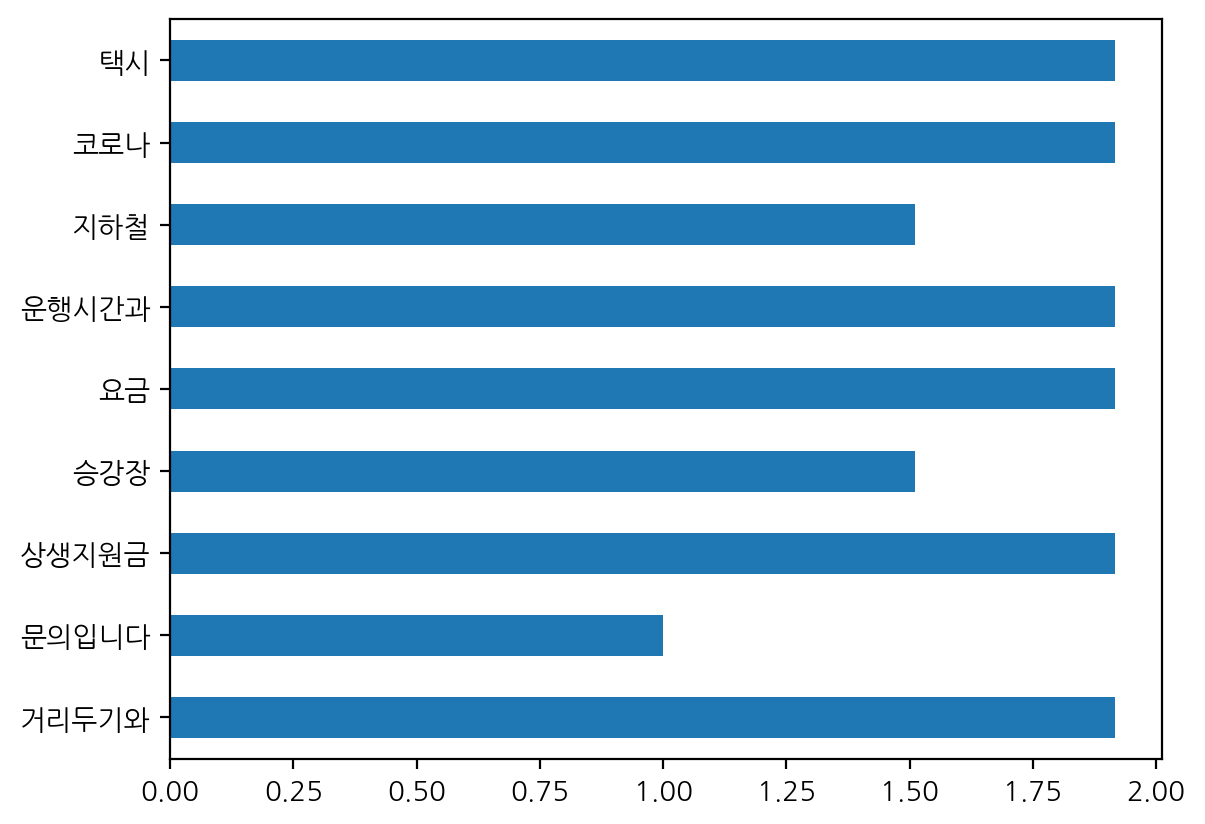

In [34]:
# idf_dict 값 시각화
pd.Series(idf_dict).plot.barh()

### TfidfVectorizer 의 다양한 기능 사용하기
* analyzer
* n-gram
* min_df, max_df
* max_features
* stop_words

In [35]:
# analyzer='char_wb', ngram_range=(2, 3), max_df=1.0, min_df=1
tfidfvect = TfidfVectorizer(analyzer="word", ngram_range=(1, 2), max_df=1.0, min_df=1)
dtm = tfidfvect.fit_transform(corpus)
vocab = tfidfvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
print("단어 수 : ", len(vocab))
print(vocab)
display(df_dtm.style.background_gradient())

단어 수 :  20
['거리두기와' '거리두기와 코로나' '문의입니다' '상생지원금' '상생지원금 문의입니다' '승강장' '승강장 문의입니다' '요금'
 '요금 문의입니다' '운행시간과' '운행시간과 지하철' '지하철' '지하철 승강장' '지하철 요금' '지하철 운행시간과' '코로나'
 '코로나 거리두기와' '코로나 상생지원금' '택시' '택시 승강장']


,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,0.312008,0.312008,0.162819,0.312008,0.312008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.624016,0.312008,0.312008,0.000000,0.000000
1,0.000000,0.000000,0.176327,0.000000,0.000000,0.000000,0.000000,0.337894,0.337894,0.337894,0.337894,0.532799,0.000000,0.337894,0.337894,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.294628,0.000000,0.000000,0.445132,0.445132,0.000000,0.000000,0.000000,0.000000,0.445132,0.564594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.278320,0.000000,0.000000,0.420493,0.420493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533343,0.533343
